First, we'll pull our normal libraries for working on projects like this.

In [112]:
import pandas as pd             # for the data.
import numpy as np              # for a NaN type
import matplotlib.pyplot as plt # For plotting, and some customization of plots.
import seaborn as sns           # For pretty plots.

# Fix the size of the graphs
sns.set(rc={"figure.figsize":(11, 8)})

Our data source is still going to be the [Official Wiki](https://thecyclefrontier.wiki/wiki/Main_Page) and we'll be pulling from the [**Loot Page** ](https://thecyclefrontier.wiki/wiki/Loot) - which has already started being updated for Season Two. From my previous post, the class `zebra` is still the best attribute to target to pull the data into a usable Data Frame. 

In [49]:
url = "https://thecyclefrontier.wiki/wiki/Loot"
site = pd.read_html(url, attrs={"class":"zebra"})[0]
site.head(15)

,Image,Name,Rarity,Weight,K-Marks,K-Marks / Weight,Personal Quarters,Campaigns,Jobs,Printing
0,NaN,Flawed Veltecite,Common,3.0,150 K-Marks 2 Reputation,50 K-Marks / Weight 0.67 Reputation / Weight,Yes x11,Yes x10,Yes,NaN
1,150.00,K-Marks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.00,Reputation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,50.00,K-Marks / Weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.67,Reputation / Weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Cloudy Veltecite,Uncommon,3.0,570 K-Marks 6 Reputation,190 K-Marks / Weight 2 Reputation / Weight,Yes x8,Yes x14,Yes,Yes
6,570.00,K-Marks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6.00,Reputation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,190.00,K-Marks / Weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2.00,Reputation / Weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Again, from previous experience, it is best to create a copy of columns that we actually need.

In [50]:
lootSubset = site[['Image', 'Name', 'Rarity', 'Personal Quarters', 'Campaigns', 'Jobs', 'Printing']].copy()
lootSubset.head()

,Image,Name,Rarity,Personal Quarters,Campaigns,Jobs,Printing
0,NaN,Flawed Veltecite,Common,Yes x11,Yes x10,Yes,NaN
1,150.00,K-Marks,NaN,NaN,NaN,NaN,NaN
2,2.00,Reputation,NaN,NaN,NaN,NaN,NaN
3,50.00,K-Marks / Weight,NaN,NaN,NaN,NaN,NaN
4,0.67,Reputation / Weight,NaN,NaN,NaN,NaN,NaN


Looking at our data, we already have a problem: the `Printing` column has columns `NaN` values insted of no. The blank values got converted to `NaN` when it was imported. While I'm sure there is a way to correct this on import, this isn't how I'm going to do it. What I'm going to do is find the indexes which contain `Yes` and then update the other columns. You might be thinking - correctly - that we could simply find the indexes of the other values and then update those. Unfortunately, this is harder and I'll show you what I mean.

If we check the values, we'll see there is this `nan` value which doens't look like the normal `np.NaN` value.

In [51]:
lootSubset.Printing.unique(), lootSubset.Printing[0]

(array([nan, 'Yes'], dtype=object), nan)

And, if we try to do a logical comparison with the literal value from the data it fails.

In [52]:
lootSubset.Printing.iloc[:5] == lootSubset.Printing[0]

0    False
1    False
2    False
3    False
4    False
Name: Printing, dtype: bool

Here we so the problem with objects and probably the pointers underneath. We *could* fix this but it's much easier to  reverse what we're detecting so I'm doing that instead.

In [54]:
# That nan value is weird; will do the opposite
filterIndex = lootSubset.Printing == "Yes"
lootSubset[~filterIndex].head()

,Image,Name,Rarity,Personal Quarters,Campaigns,Jobs,Printing
0,NaN,Flawed Veltecite,Common,Yes x11,Yes x10,Yes,NaN
1,150.00,K-Marks,NaN,NaN,NaN,NaN,NaN
2,2.00,Reputation,NaN,NaN,NaN,NaN,NaN
3,50.00,K-Marks / Weight,NaN,NaN,NaN,NaN,NaN
4,0.67,Reputation / Weight,NaN,NaN,NaN,NaN,NaN


I'm not going to spend much time explaining this part; please see the previous posts about how this works.

In [55]:
# Correct it
lootSubset.loc[~filterIndex, "Printing"] = "No"
lootSubset.head(9)

,Image,Name,Rarity,Personal Quarters,Campaigns,Jobs,Printing
0,NaN,Flawed Veltecite,Common,Yes x11,Yes x10,Yes,No
1,150.00,K-Marks,NaN,NaN,NaN,NaN,No
2,2.00,Reputation,NaN,NaN,NaN,NaN,No
3,50.00,K-Marks / Weight,NaN,NaN,NaN,NaN,No
4,0.67,Reputation / Weight,NaN,NaN,NaN,NaN,No
5,NaN,Cloudy Veltecite,Uncommon,Yes x8,Yes x14,Yes,Yes
6,570.00,K-Marks,NaN,NaN,NaN,NaN,No
7,6.00,Reputation,NaN,NaN,NaN,NaN,No
8,190.00,K-Marks / Weight,NaN,NaN,NaN,NaN,No


Looking at the rows, we can see the data we're after - the Name of the Loot - is in the `Name` column. Luckily, like the [previous post](https://orgulo.us/game/python/data/science/exploration/cycle/frontier/2022/09/28/cycle-jobs-part-one.html) about data extraction, these are in multiples of 5 insted of 4 like before. So, we can simply borrow the same code from before and update the range.

In [56]:
    # Change range to 5 instead of 4
    index = range( 0, len(lootSubset) - 4, 5)
    offset = np.array([1, 2, 3, 4])

In [57]:
tmp = index[0] + offset
lootSubset.iloc[tmp]

,Image,Name,Rarity,Personal Quarters,Campaigns,Jobs,Printing
1,150.00,K-Marks,NaN,NaN,NaN,NaN,No
2,2.00,Reputation,NaN,NaN,NaN,NaN,No
3,50.00,K-Marks / Weight,NaN,NaN,NaN,NaN,No
4,0.67,Reputation / Weight,NaN,NaN,NaN,NaN,No


In [58]:
lootSubset.iloc[index].tail()

,Image,Name,Rarity,Personal Quarters,Campaigns,Jobs,Printing
445,NaN,Hardened Metals,Common,Yes x17,Yes x2,Yes,Yes
450,NaN,Compound Sheets,Common,Yes x18,Yes x36,Yes,No
455,NaN,Print Resin,Uncommon,Yes x44,Yes x2,NaN,Yes
460,NaN,Salvaged Insulation,Common,Yes x38,Yes x30,NaN,No
465,NaN,Aluminum Scrap,Common,Yes x28,NaN,Yes,Yes


Now we'll build the loop for the iteration like before.

In [59]:
# this is how we'll iterate; proof it works.
# refer the .head() call to see this is true.
for i in index[:3]:
    # we'll need to shift this to index 1 since 0 contains information we want.
    aLoot = lootSubset.iloc[i, 1]
    print(f'{aLoot} is at index {i}')

Flawed Veltecite is at index 0
Cloudy Veltecite is at index 5
Clear Veltecite is at index 10


Now we need a column to dump the correct values into which is going to be called `Loot`. We'll fill these with `np.NaN` so we can repeat the same trick as the previous post.

In [60]:
lootSubset = lootSubset.assign(
    Loot = np.NaN
)
lootSubset.head()

,Image,Name,Rarity,Personal Quarters,Campaigns,Jobs,Printing,Loot
0,NaN,Flawed Veltecite,Common,Yes x11,Yes x10,Yes,No,NaN
1,150.00,K-Marks,NaN,NaN,NaN,NaN,No,NaN
2,2.00,Reputation,NaN,NaN,NaN,NaN,No,NaN
3,50.00,K-Marks / Weight,NaN,NaN,NaN,NaN,No,NaN
4,0.67,Reputation / Weight,NaN,NaN,NaN,NaN,No,NaN


So, pull the name of of the loot per subset and then update it like before.

In [61]:
for i in index:
    # Correct Loot column
    aLoot = lootSubset.iloc[i, 1]
    indexes = i + offset
    lootSubset.iloc[ indexes, 7 ] = aLoot

In [62]:
lootSubset.head(15)

,Image,Name,Rarity,Personal Quarters,Campaigns,Jobs,Printing,Loot
0,NaN,Flawed Veltecite,Common,Yes x11,Yes x10,Yes,No,NaN
1,150.00,K-Marks,NaN,NaN,NaN,NaN,No,Flawed Veltecite
2,2.00,Reputation,NaN,NaN,NaN,NaN,No,Flawed Veltecite
3,50.00,K-Marks / Weight,NaN,NaN,NaN,NaN,No,Flawed Veltecite
4,0.67,Reputation / Weight,NaN,NaN,NaN,NaN,No,Flawed Veltecite
5,NaN,Cloudy Veltecite,Uncommon,Yes x8,Yes x14,Yes,Yes,NaN
6,570.00,K-Marks,NaN,NaN,NaN,NaN,No,Cloudy Veltecite
7,6.00,Reputation,NaN,NaN,NaN,NaN,No,Cloudy Veltecite
8,190.00,K-Marks / Weight,NaN,NaN,NaN,NaN,No,Cloudy Veltecite
9,2.00,Reputation / Weight,NaN,NaN,NaN,NaN,No,Cloudy Veltecite


If we play through the old trick of dropping the `Loot` columns now we'll lose valuable data. So, we'll need a new trick to keep that data. Thankfully, this is a problem I'd already solved at a previous time: we'll simply fill the values. As a word of caution, filling values can be dangerous to an analysis so if you're doing this then **make sure it will not have a negative impact**. In this instance, I'm duplicating the data so that it's not lost at all. Even then, we'll need to be cautious in the future about how the data is used.

There are a few techniques for filling in missing values and one such technique is called **Fill Forward**. What this does is take the values in a column, take that value and then simply inserts it down the rows where it finds NAs. This is exactly what we're after - but only for those specific columns.

In [63]:
# fix the middle by filling down
tmp = lootSubset.iloc[:, 1:7]
tmp = tmp.fillna(method="ffill")
tmp.head(15)

,Name,Rarity,Personal Quarters,Campaigns,Jobs,Printing
0,Flawed Veltecite,Common,Yes x11,Yes x10,Yes,No
1,K-Marks,Common,Yes x11,Yes x10,Yes,No
2,Reputation,Common,Yes x11,Yes x10,Yes,No
3,K-Marks / Weight,Common,Yes x11,Yes x10,Yes,No
4,Reputation / Weight,Common,Yes x11,Yes x10,Yes,No
5,Cloudy Veltecite,Uncommon,Yes x8,Yes x14,Yes,Yes
6,K-Marks,Uncommon,Yes x8,Yes x14,Yes,No
7,Reputation,Uncommon,Yes x8,Yes x14,Yes,No
8,K-Marks / Weight,Uncommon,Yes x8,Yes x14,Yes,No
9,Reputation / Weight,Uncommon,Yes x8,Yes x14,Yes,No


Then, we'll take these values and simply insert them into the real data frame where we want them.

In [64]:
lootSubset.iloc[:, 1:7] = tmp
lootSubset.head(15)

,Image,Name,Rarity,Personal Quarters,Campaigns,Jobs,Printing,Loot
0,NaN,Flawed Veltecite,Common,Yes x11,Yes x10,Yes,No,NaN
1,150.00,K-Marks,Common,Yes x11,Yes x10,Yes,No,Flawed Veltecite
2,2.00,Reputation,Common,Yes x11,Yes x10,Yes,No,Flawed Veltecite
3,50.00,K-Marks / Weight,Common,Yes x11,Yes x10,Yes,No,Flawed Veltecite
4,0.67,Reputation / Weight,Common,Yes x11,Yes x10,Yes,No,Flawed Veltecite
5,NaN,Cloudy Veltecite,Uncommon,Yes x8,Yes x14,Yes,Yes,NaN
6,570.00,K-Marks,Uncommon,Yes x8,Yes x14,Yes,No,Cloudy Veltecite
7,6.00,Reputation,Uncommon,Yes x8,Yes x14,Yes,No,Cloudy Veltecite
8,190.00,K-Marks / Weight,Uncommon,Yes x8,Yes x14,Yes,No,Cloudy Veltecite
9,2.00,Reputation / Weight,Uncommon,Yes x8,Yes x14,Yes,No,Cloudy Veltecite


And, now we'll pull the same trick and delete the rows with `np.NaN`.

In [65]:
cutNA = lootSubset.Loot.isna()
lootData = lootSubset[ ~cutNA ]
lootData

,Image,Name,Rarity,Personal Quarters,Campaigns,Jobs,Printing,Loot
1,150.00,K-Marks,Common,Yes x11,Yes x10,Yes,No,Flawed Veltecite
2,2.00,Reputation,Common,Yes x11,Yes x10,Yes,No,Flawed Veltecite
3,50.00,K-Marks / Weight,Common,Yes x11,Yes x10,Yes,No,Flawed Veltecite
4,0.67,Reputation / Weight,Common,Yes x11,Yes x10,Yes,No,Flawed Veltecite
6,570.00,K-Marks,Uncommon,Yes x8,Yes x14,Yes,No,Cloudy Veltecite
...,...,...,...,...,...,...,...,...
464,0.60,Reputation / Weight,Common,Yes x38,Yes x30,Yes,No,Salvaged Insulation
466,506.00,K-Marks,Common,Yes x28,Yes x30,Yes,No,Aluminum Scrap
467,5.00,Reputation,Common,Yes x28,Yes x30,Yes,No,Aluminum Scrap
468,51.00,K-Marks / Weight,Common,Yes x28,Yes x30,Yes,No,Aluminum Scrap


Almost there! The column name `Image` is not what that should be called so we'll update that to `Unit` like we had in the prevous post.

In [66]:
lootData = lootData.rename(columns={'Image':'Unit'})
lootData

,Unit,Name,Rarity,Personal Quarters,Campaigns,Jobs,Printing,Loot
1,150.00,K-Marks,Common,Yes x11,Yes x10,Yes,No,Flawed Veltecite
2,2.00,Reputation,Common,Yes x11,Yes x10,Yes,No,Flawed Veltecite
3,50.00,K-Marks / Weight,Common,Yes x11,Yes x10,Yes,No,Flawed Veltecite
4,0.67,Reputation / Weight,Common,Yes x11,Yes x10,Yes,No,Flawed Veltecite
6,570.00,K-Marks,Uncommon,Yes x8,Yes x14,Yes,No,Cloudy Veltecite
...,...,...,...,...,...,...,...,...
464,0.60,Reputation / Weight,Common,Yes x38,Yes x30,Yes,No,Salvaged Insulation
466,506.00,K-Marks,Common,Yes x28,Yes x30,Yes,No,Aluminum Scrap
467,5.00,Reputation,Common,Yes x28,Yes x30,Yes,No,Aluminum Scrap
468,51.00,K-Marks / Weight,Common,Yes x28,Yes x30,Yes,No,Aluminum Scrap


Just one more problem I'd like to correct before we do some fun questions at the end. Pandas has also copied the idea of Categoreies from R. And, it allows us to set the order of the values as well. We're going to use this in a minute but it's also a nice to have.

Changing the type is just as easy as you'd think:

In [67]:
lootData.Rarity.astype('category')

1        Common
2        Common
3        Common
4        Common
6      Uncommon
         ...   
464      Common
466      Common
467      Common
468      Common
469      Common
Name: Rarity, Length: 376, dtype: category
Categories (6, object): ['Common', 'Epic', 'Exotic', 'Legendary', 'Rare', 'Uncommon']

You can see that now there is a list of the possible Categories below the values: `Categories (6, object): ['Common', 'Epic', 'Exotic', 'Legendary', 'Rare', 'Uncommon']`. However, the *order* matters and so we cannot leave this how it is; `Uncommon` is clealy not *larger* in type then `Epic`. The proper way to do this would be to declare the order - which is what is next. We'll use `pd.Categorical()` to convert them and set the order of the *Categories*.

In [80]:
lootData['Rarity'] = pd.Categorical(lootData.Rarity, categories = ['Common', 'Uncommon', 'Rare', 'Epic', 'Exotic', 'Legendary'])
pd.Categorical(lootData.Rarity, categories = ['Common', 'Uncommon', 'Rare', 'Epic', 'Exotic', 'Legendary'])

['Common', 'Common', 'Common', 'Common', 'Uncommon', ..., 'Common', 'Common', 'Common', 'Common', 'Common']
Length: 376
Categories (6, object): ['Common', 'Uncommon', 'Rare', 'Epic', 'Exotic', 'Legendary']

There we go! See that the order has now been fixed: `Categories (6, object): ['Common', 'Uncommon', 'Rare', 'Epic', 'Exotic', 'Legendary']`. Here I would like to note that I did take liberty to set `Legendary` above `Exotic` since the wiki as them mixed and the actual games sorting puts `Legendary` above `Exotic` and so I did the same.

# Conclusion and Some Questions

And, that's how you pull data from a website! Now for some interesting questions. Looking at the data we have here, there are two questions that popped out at me:
1. If you have to pick up only two items, what would they be per Rarity?
2. Given the sell values per category, is the relationship linear as the the category rises?

## What Are The Best Two Items To Sell, Per Rarity?

This is a pretty simple ask. We just have to remember that we're working with [**Tidy Data**](https://vita.had.co.nz/papers/tidy-data.pdf) and we'll want to filter the `Name` column for K-Marks before doing anything else.
Next, we'll do a `groupby()` for the Rarity and then pull out the `Units` column since that has the values we're after. Luckily, pandas already has a function to get the largest values `.largest()` which also works as an  *aggregation* function for `groupby()`.

In [102]:
tmp = lootData.query("Name == 'K-Marks'").groupby("Rarity")['Unit'].nlargest(2)
tmp

Rarity        
Common     336       900.0
           111       760.0
Uncommon   356      3417.0
           181      1709.0
Rare       371     11533.0
           366      5126.0
Epic       121     20183.0
           396     17300.0
Exotic     401    129746.0
           106     77848.0
Legendary  441    518985.0
           431    116772.0
Name: Unit, dtype: float64

So, we have our values but we don't have any way to identify them since we cannot include the `Name` column since then it becomes a Data Frame and `.nlargest()` doesn't work. If we look closely, the old indexes have been carried over and are included in our results so we'll need to give ourselves access to them. We're going to do this with `.reset_index()` since that will push those indexes into the Data Frame.

In [104]:
tmp.reset_index()

,Rarity,level_1,Unit
0,Common,336,900.0
1,Common,111,760.0
2,Uncommon,356,3417.0
3,Uncommon,181,1709.0
4,Rare,371,11533.0
5,Rare,366,5126.0
6,Epic,121,20183.0
7,Epic,396,17300.0
8,Exotic,401,129746.0
9,Exotic,106,77848.0


In [105]:
# Keep those index numbers
tmp = tmp.reset_index()

The index column is called `level_1` which we're going to simply insert into the original data.

In [106]:
# Best items to sell per rarity:
lootData.loc[ tmp['level_1'].tolist() ].sort_values("Rarity", ascending=False)[['Unit', 'Name', 'Rarity', 'Loot']]

,Unit,Name,Rarity,Loot
441,518985.0,K-Marks,Legendary,Alpha Crusher Head
431,116772.0,K-Marks,Legendary,Savage Marauder Head
401,129746.0,K-Marks,Exotic,Alpha Crusher Heart
106,77848.0,K-Marks,Exotic,Progenitor Slag
121,20183.0,K-Marks,Epic,NiC Oil Cannister
396,17300.0,K-Marks,Epic,Crusher Flesh
371,11533.0,K-Marks,Rare,Crusher Hide
366,5126.0,K-Marks,Rare,Mature Rattler Eyes
356,3417.0,K-Marks,Uncommon,Hardened Bone Plates
181,1709.0,K-Marks,Uncommon,Derelict Explosives


There we go! Well, except that this doesn't account for weight and what we **really want** is to carry the most value per weight since we're limited in the game by the backpack size. Let's do the same but for the `per weight` value instead.

In [108]:
tmp = lootData.query("Name == 'K-Marks / Weight'").groupby("Rarity")['Unit'].nlargest(2).reset_index()
lootData.loc[ tmp['level_1'].tolist() ].sort_values("Rarity", ascending=False)[['Unit', 'Name', 'Rarity', 'Loot']]

,Unit,Name,Rarity,Loot
443,17300.0,K-Marks / Weight,Legendary,Alpha Crusher Head
433,5839.0,K-Marks / Weight,Legendary,Savage Marauder Head
108,6487.0,K-Marks / Weight,Exotic,Progenitor Slag
403,6487.0,K-Marks / Weight,Exotic,Alpha Crusher Heart
123,4037.0,K-Marks / Weight,Epic,NiC Oil Cannister
118,3844.0,K-Marks / Weight,Epic,Letium Clot
373,1153.0,K-Marks / Weight,Rare,Crusher Hide
368,1025.0,K-Marks / Weight,Rare,Mature Rattler Eyes
458,570.0,K-Marks / Weight,Uncommon,Print Resin
358,380.0,K-Marks / Weight,Uncommon,Hardened Bone Plates


And, now we see there are some important changes. The values in the `Common Rarity` are totally different!

## Are the Rarity Values Linear?

We'll aggregate over all the values in a category and then simply plot them.

Text(0.5, 1.0, 'Mean K-Marks Per Rarity')

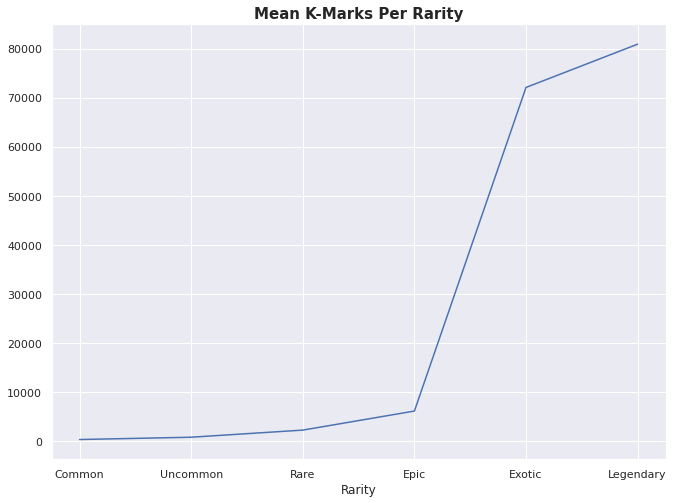

In [113]:
lootData.query("Name == 'K-Marks'").groupby("Rarity")['Unit'].mean().plot()
plt.title("Mean K-Marks Per Rarity", size=15, fontweight='bold')

Wait, what? This looks terrible! Everything from `Common` to `Epic` is worth nothing compared to `Exotic` and `Legendary`. Maybe we're dealing with some outlier problems? Let's check the `median` just in case.

Text(0.5, 1.0, 'Median K-Marks Per Rarity')

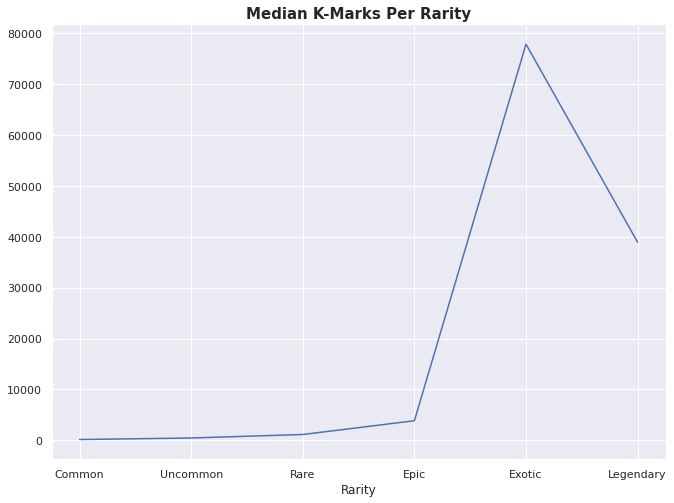

In [115]:
lootData.query("Name == 'K-Marks'").groupby("Rarity")['Unit'].median().plot()
plt.title("Median K-Marks Per Rarity", size=15, fontweight='bold')

This is even worse! `Legendary` loot is definitely being affected by outliers but `Exotic` is so far and above better than everything else. Maybe we're looking at the wrong values? Maybe we're making the same mistake and we need to account for the `per weight`?

Text(0.5, 1.0, 'Median K-Marks/Weight Per Rarity')

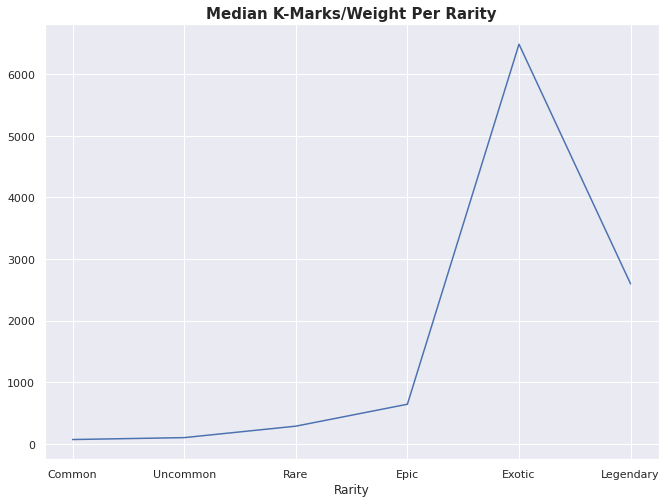

In [117]:
lootData.query("Name == 'K-Marks / Weight'").groupby("Rarity")['Unit'].median().plot()
plt.title("Median K-Marks/Weight Per Rarity", size=15, fontweight='bold')

I mean it's better but not really. What is in this category?

In [124]:
lootData.query("Rarity == 'Exotic'").query("Name == 'K-Marks'")

,Unit,Name,Rarity,Personal Quarters,Campaigns,Jobs,Printing,Loot
91,8650.0,K-Marks,Exotic,Yes x4,Yes x9,Yes,No,Charged Tharis Iron Ingot
106,77848.0,K-Marks,Exotic,Yes x6,Yes x9,Yes,No,Progenitor Slag
401,129746.0,K-Marks,Exotic,Yes x6,Yes x1,Yes,No,Alpha Crusher Heart


This category makes no sense and I don't know why it exists. I'm not sure they understand what this category is for either looking at what is in here.
But, that will be it for now.